In [2]:
# 一，数据预处理
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

In [3]:
# 读取数据
data=pd.read_csv("D:/火狐浏览器下载/B题-全部数据/B题-全部数据/order_train1.csv")
data

FileNotFoundError: File b'D:/\xe7\x81\xab\xe7\x8b\x90\xe6\xb5\x8f\xe8\xa7\x88\xe5\x99\xa8\xe4\xb8\x8b\xe8\xbd\xbd/B\xe9\xa2\x98-\xe5\x85\xa8\xe9\x83\xa8\xe6\x95\xb0\xe6\x8d\xae/B\xe9\xa2\x98-\xe5\x85\xa8\xe9\x83\xa8\xe6\x95\xb0\xe6\x8d\xae/order_train1.csv' does not exist

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         597694 non-null  object 
 1   sales_region_code  597694 non-null  int64  
 2   item_code          597694 non-null  int64  
 3   first_cate_code    597694 non-null  int64  
 4   second_cate_code   597694 non-null  int64  
 5   sales_chan_name    597694 non-null  object 
 6   item_price         597694 non-null  float64
 7   ord_qty            597694 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 36.5+ MB


In [7]:
data.describe()

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty
count,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000
mean,102.903949,21008.015983,304.932094,406.457174,1076.241578,91.650505
std,1.504880,590.896347,2.004195,3.107329,1167.511104,199.843336
min,101.000000,20001.000000,301.000000,401.000000,1.000000,1.000000
25%,102.000000,20518.000000,303.000000,404.000000,598.000000,10.000000
50%,103.000000,20976.000000,306.000000,407.000000,883.000000,29.000000
75%,105.000000,21521.000000,306.000000,408.000000,1291.000000,101.000000
max,105.000000,22084.000000,308.000000,412.000000,260014.000000,16308.000000


In [8]:
# 查看缺失值
missdata=data.isnull().sum()
missdata

order_date           0
sales_region_code    0
item_code            0
first_cate_code      0
second_cate_code     0
sales_chan_name      0
item_price           0
ord_qty              0
dtype: int64

In [9]:
# 去除重复数据
data.drop_duplicates(inplace=True)
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3
...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59
597690,2018-12-20,102,21875,302,408,offline,762.0,502
597691,2018-12-20,102,20215,302,408,offline,2013.0,106
597692,2018-12-20,102,20195,302,408,offline,2120.0,187


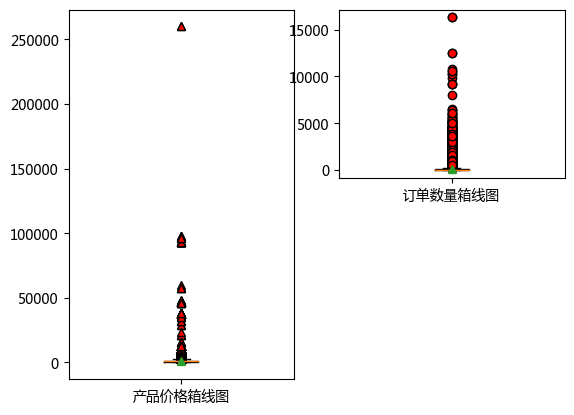

In [10]:
# 用箱线图来进行异常值分析
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
fig=plt.figure()
ax1=plt.subplot(121)
ax2=plt.subplot(222)
ax1.boxplot(data['item_price'],showmeans=True,flierprops={'marker':'^','markerfacecolor':'red'},labels=['产品价格箱线图'])
ax2.boxplot(data['ord_qty'],showmeans=True,flierprops={'marker':'o','markerfacecolor':'red'},labels=['订单数量箱线图'])
plt.savefig("预处理箱线图")
plt.show()


In [11]:
# 判断‘item_price’列是否符合正态分布
u = data['item_price'].mean()  # 计算均值
std = data['item_price'].std()  # 计算标准差
res = kstest(data['item_price'], 'norm',(u, std))
print(u,std,res)
if res[1] <= 0.05:
    print('该列数据服从正态分布------')
    print('均值为：%.3f,标准差为：%.3f' % (u, std))

1076.1415119145195 1167.576589804634 KstestResult(statistic=0.20859908137028937, pvalue=0.0, statistic_location=206.0, statistic_sign=-1)
该列数据服从正态分布------
均值为：1076.142,标准差为：1167.577


In [12]:
# 判断‘ord_qty’列是否符合正态分布
u = data['ord_qty'].mean()  # 计算均值
std = data['ord_qty'].std()  # 计算标准差
res = kstest(data['ord_qty'], 'norm',(u, std))
print(u,std,res)
if res[1]<= 0.05:
    print('该列数据服从正态分布------')
    print('均值为：%.3f,标准差为：%.3f' % (u, std))

91.68390075362164 199.88712936067546 KstestResult(statistic=0.3251197395409038, pvalue=0.0, statistic_location=2, statistic_sign=-1)
该列数据服从正态分布------
均值为：91.684,标准差为：199.887


In [13]:
# 利用3Q准则去除异常值
def three_sigma(Ser1):  # Ser1：表示传入DataFrame的某一列
    rule = []
    rule = (Ser1.mean() - 3 * Ser1.std() > Ser1) | (Ser1.mean() + 3 * Ser1.std() < Ser1)
    out = Ser1.index[rule]
    return out  # 返回落在3sigma之外的行索引值

def delete_3Q(data,list_norm):
    out_index=[]
    for col in list_norm:
        index=three_sigma(data[col])
        out_index+=index.tolist()
    delete_=list(set(out_index))
    print('共计删除异常行：',len(delete_))
    data.drop(delete_,inplace=True)
    return data
delete_3Q(data,['item_price','ord_qty'])

共计删除异常行： 14586


,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3
...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59
597690,2018-12-20,102,21875,302,408,offline,762.0,502
597691,2018-12-20,102,20215,302,408,offline,2013.0,106
597692,2018-12-20,102,20195,302,408,offline,2120.0,187


In [14]:
# 保存预处理数据文件，这个步骤是为了第（8）问服务
data.to_csv("D:/火狐浏览器下载/B题-全部数据/B题-全部数据/data1.csv")

In [15]:
# 二，数据分析
#（1）产品的不同价格对需求量的影响
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
%matplotlib inline

In [16]:
# 按照产品价格分组，并计算订单数量平均值
groupedata = data.groupby('item_price')['ord_qty'].mean().reset_index()
groupedata

,item_price,ord_qty
0,1.00,12.571429
1,1.01,6.352941
2,2.00,16.545455
3,2.01,7.157895
4,3.00,11.666667
...,...,...
13087,4568.76,4.000000
13088,4569.00,10.062500
13089,4572.28,3.000000
13090,4575.28,5.000000


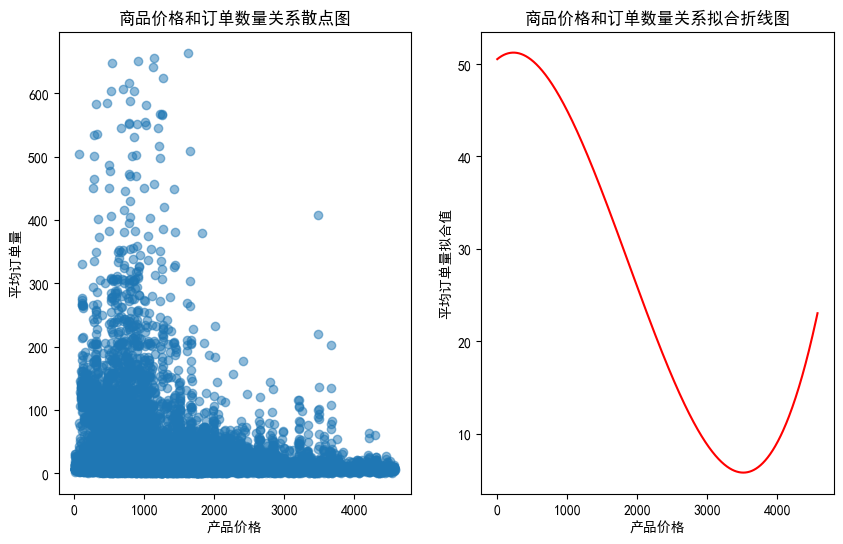

In [17]:
# 使用 Matplotlib 画图
plt.rcParams['font.sans-serif']=['SimHei']
fig=plt.figure(figsize=(10, 6))
ax1=plt.subplot(121)
ax2=plt.subplot(122)
ax1.scatter(groupedata['item_price'], groupedata['ord_qty'],alpha=0.5)
ax1.set_title('商品价格和订单数量关系散点图')
ax1.set_xlabel('产品价格')
ax1.set_ylabel('平均订单量')
ploy=np.polyfit(groupedata['item_price'], groupedata['ord_qty'],deg=3)
ax2.plot(groupedata['item_price'],np.polyval(ploy,groupedata['item_price']),color='red')
ax2.set_title('商品价格和订单数量关系拟合折线图')
ax2.set_xlabel('产品价格')
ax2.set_ylabel('平均订单量拟合值')
plt.show()

In [18]:
#（2）产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


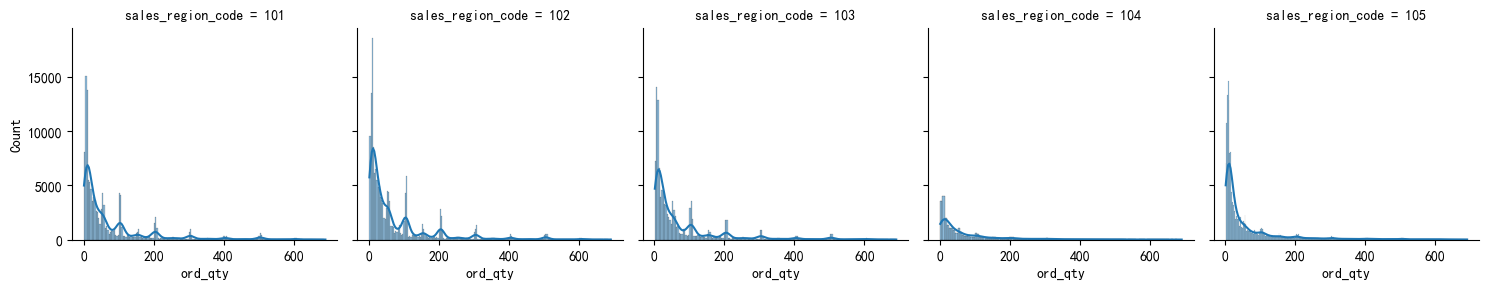

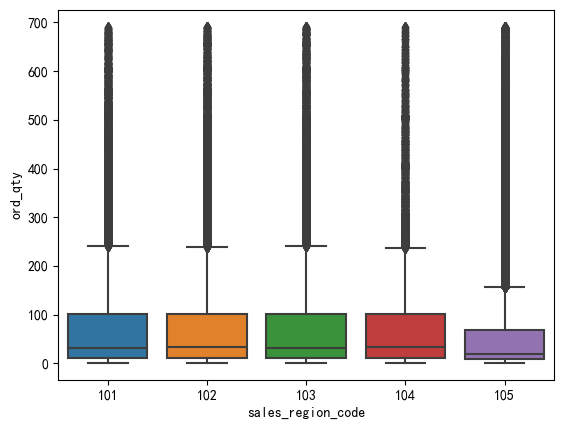

In [20]:
# 绘制直方图
g=sns.FacetGrid(data,col='sales_region_code')
g.map(sns.histplot,'ord_qty',kde=True)
plt.savefig("1.2.png")
g.add_legend()
plt.show()
# 绘制箱线图
sns.boxplot(x='sales_region_code', y='ord_qty', data=data)
plt.savefig("1.2箱线图.png")
plt.show()

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [24]:
# 进行ANOVA方差分析
region_group_data = data.groupby('sales_region_code')['ord_qty'].apply(list)
region_group_data[101]
model=ols('ord_qty~C(sales_region_code)',data).fit()
anova_table=anova_lm(model)
print(anova_table)


                            df        sum_sq       mean_sq           F  \
C(sales_region_code)       4.0  1.478617e+07  3.696541e+06  314.292906   
Residual              582791.0  6.854469e+09  1.176145e+04         NaN   

                             PR(>F)  
C(sales_region_code)  1.261221e-270  
Residual                        NaN  


In [25]:
#（3）不同销售方式（线上和线下）的产品需求量的特性
# 将数据按照销售渠道名称分为线上和线下两类
online_data = data[data['sales_chan_name'] == 'online']
offline_data = data[data['sales_chan_name'] == 'offline']

# 计算线上和线下订单需求量的基本统计量
print('线上订单需求量的基本统计量：\n',online_data['ord_qty'].describe())
print('线下订单需求量的基本统计量：\n',offline_data['ord_qty'].describe())


线上订单需求量的基本统计量：
 count    153851.000000
mean         83.955561
std         118.267761
min           1.000000
25%          12.000000
50%          35.000000
75%         103.000000
max         691.000000
Name: ord_qty, dtype: float64
线下订单需求量的基本统计量：
 count    428945.000000
mean         69.427202
std         104.602996
min           1.000000
25%           9.000000
50%          26.000000
75%          85.000000
max         691.000000
Name: ord_qty, dtype: float64


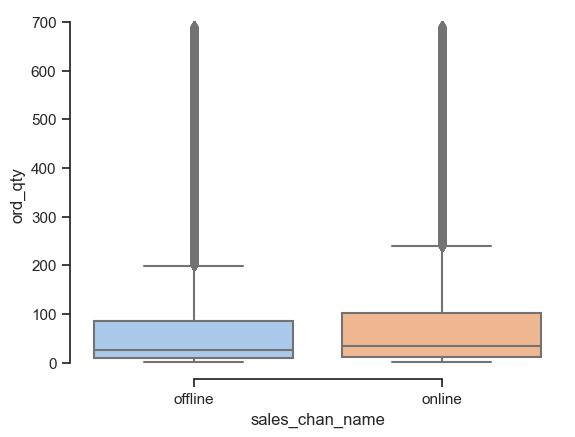

In [26]:
# 设置图形风格
sns.set(style="ticks", palette="pastel")
# 绘制箱线图，分析线上和线下订单需求量的分布情况
sns.boxplot(x="sales_chan_name", y="ord_qty", data=data)

# 显示图形
sns.despine(trim=True)

plt.savefig('1.(3).1.png',dpi=300)
plt.show()

In [27]:
# (4)不同品类之间的产品需求量有何不同点和共同点
# 将订单日期格式转为 datetime 类型
data['order_date'] = pd.to_datetime(data['order_date'])
data['year'] = data.order_date.dt.year #分解出年份
data['month'] = data.order_date.dt.month
data['day'] = data.order_date.dt.day
data["week"] = data.order_date.dt.weekofyear
data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6852\1611287561.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data["week"] = data.order_date.dt.weekofyear


,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,year,month,day,week
0,2015-09-01,104,22069,307,403,offline,1114.0,19,2015,9,1,36
1,2015-09-01,104,20028,301,405,offline,1012.0,12,2015,9,1,36
2,2015-09-02,104,21183,307,403,online,428.0,109,2015,9,2,36
3,2015-09-02,104,20448,308,404,online,962.0,3,2015,9,2,36
4,2015-09-02,104,21565,307,403,offline,1400.0,3,2015,9,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59,2018,12,20,51
597690,2018-12-20,102,21875,302,408,offline,762.0,502,2018,12,20,51
597691,2018-12-20,102,20215,302,408,offline,2013.0,106,2018,12,20,51
597692,2018-12-20,102,20195,302,408,offline,2120.0,187,2018,12,20,51


In [28]:
# 不同品类之间的产品需求量有何不同点和共同点
# 1.2015-2018年 不同大品类需求量分析
# 2.2015-2018年 不同细分品类需求量分析

# 1.1 首先需要统计出每年中每月的每个大品类需求量（first_groupby）：
first_groupby = data.groupby(['first_cate_code','year','month'])[['order_date']].sum().reset_index()
first_groupby

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6852\1490325560.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  first_groupby = data.groupby(['first_cate_code','year','month'])[['order_date']].sum().reset_index()


,first_cate_code,year,month
0,301,2015,9
1,301,2015,10
2,301,2015,11
3,301,2015,12
4,301,2016,1
...,...,...,...
315,308,2018,8
316,308,2018,9
317,308,2018,10
318,308,2018,11


In [29]:
# 1.2 利用二维列表存储数据
first_groupby = data.groupby(['first_cate_code','year','month'])[['ord_qty']].sum().reset_index()
first_groupby

,first_cate_code,year,month,ord_qty
0,301,2015,9,11295
1,301,2015,10,28724
2,301,2015,11,11242
3,301,2015,12,12295
4,301,2016,1,27444
...,...,...,...,...
315,308,2018,8,102353
316,308,2018,9,179698
317,308,2018,10,202143
318,308,2018,11,184540


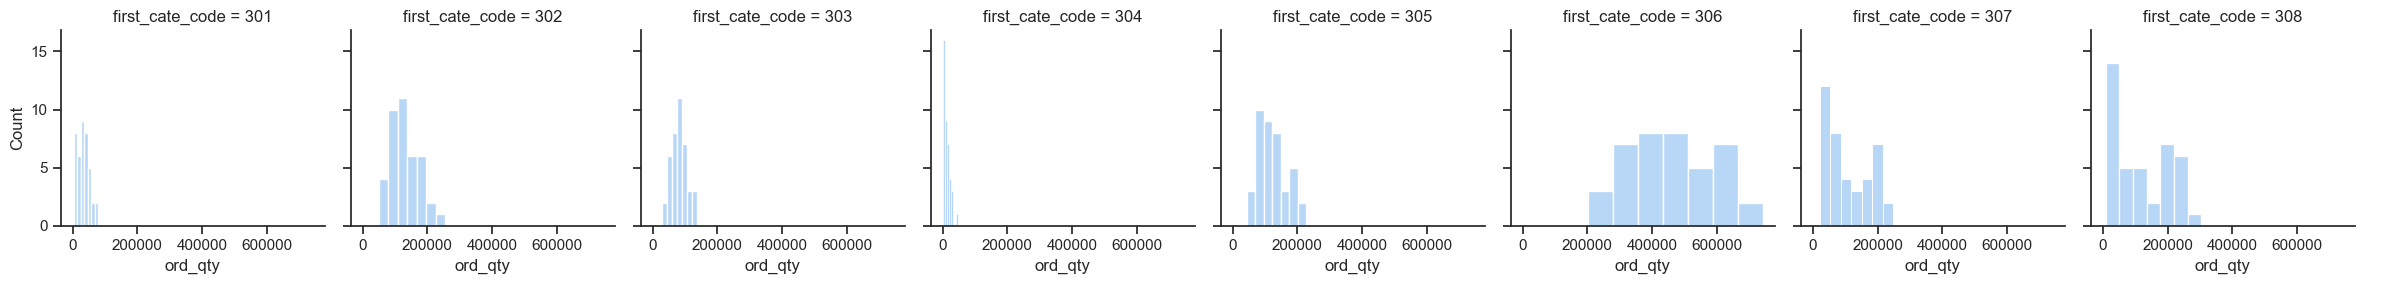

In [30]:
# 分销售区域编码绘图
g=sns.FacetGrid(first_groupby,col='first_cate_code')
g.map(sns.histplot,'ord_qty')
g.add_legend()
plt.savefig("1.4.png")
plt.show()

In [ ]:
#（5） 不同时间段（例如月头、月中、月末等）产品需求量有何特性


In [1]:
data['标签'] = "空"
data

for index,row in data.iterrows():
    print(row['订单日期'])
    ts = pd.Timestamp(row['year'],row['month'],row['day'])
    end=ts+pd.offsets.MonthEnd()
    if row['订单日期'] < pd.to_datetime(end) and row['订单日期'] <=pd.to_datetime(pd.Timestamp(row['year'],row['month'],10)):
        data.at[index,'标签'] = "月初"
    elif pd.to_datetime(pd.Timestamp(row['year'], row['month'],10))< row['订单日期']  <=pd.to_datetime(pd.Timestamp(row['year'],row['month'],20)):
        data.at[index,'标签'] = "月中" 
    else:
        data.at[index,'标签'] = "月末" 
                        
data

NameError: name 'data' is not defined

In [ ]:
df_train = data[['订单日期','year','month','day','订单需求量','标签']]
df_train.head(40)
df_t = df_train6.groupby(['订单日期','year','month','day','标签']).sum().reset_index()
df_t

df_t_count = df_t[['year','month','标签','订单需求量']].groupby(['year','month','标签']).sum().reset_index()
df_t_count

In [ ]:

date= []

for index in range(len(df_t_count)):
    rq = str(df_t_count.iloc[index]['year'])+'-'+str(df_t_count.iloc[index]['month'])
    datei.append(rq)
    
df_t_count['日期s'] = date
df_t_count

In [ ]:
start =   df_t_count.loc[df_t_count['标签']=="月初"]  #通过loc方法，得到月初、、月中、月末三张表
start
# len(start)
mid =   df_t_count.loc[df_t_count['标签']=="月中"]
# start
len(mid)
end =   df_t_count.loc[df_1_count['标签']=="月末"]
# start
len(end)
x_data = list(start['日期s'])
y_data_start = list(start['订单需求量'])
y_data_mid = list(mid['订单需求量'])
y_data_end = list(end['订单需求量'])
y_data_end.append(0)
y_data_end

In [ ]:
font1 = {'family' : 'SimSun','weight' : 'normal','size'   : 20,}
colors =['black','green','yellow','blue','cyan','red','orange','pink']
plt.figure(dpi=300,figsize=(28,12))


plt.plot(x_data,y_data_yuecu,color='green')
plt.plot(x_data,y_data_yuezhon,color='red')
plt.plot(x_data,y_data_yuemo,color='blue')

plt.tick_params(labelsize=20)
plt.xlabel('日期',fontdict=font1)
plt.xticks(rotation=30)
plt.ylabel('需求量',fontdict=font1)
plt.legend(['月初','月中','月末'],prop = {'size':15})
plt.title('不同时间段需求量分析',fontdict=font1)
plt.show()

In [ ]:
# 节假日对产品需求量的影响；

In [ ]:
import datetime
 
# 判断 2018年4月30号 是不是节假日
from chinese_calendar import df_holiday, df_workday

df_holidays =[]  #判断是否为节假日。1为是，0为不是
for index,row in data.iterrows():
    day = datetime.date(int(row['year']), int(row['month']),int(row['day']))
    if df_holiday(day):
        df_holidays.append(1)
    else:
        df_holidays.append(0)
data['是否节假日'] = df_holidays  #加入到表格汇总
data

In [ ]:
hd = data.loc[data['是否节假日']==1,:]  #获取为节假日的数据
hd = hd[['订单日期','订单需求量']].groupby(['订单日期']).sum().reset_index()  #再对节假日当天的需求量求和统计
hd

data = data[['订单日期','订单需求量']].groupby(['订单日期']).sum().reset_index()
data


plt.figure(dpi=300,figsize=(38,25))
plt.plot(data['订单日期'],data['订单需求量'].values,color='black')  #绘制每天的需求量
plt.scatter(hd['订单日期'],hd['订单需求量'].values,color='r',linewidths=10) #绘制节假日当天的需求量。
plt.xlabel('日期',fontdict=font1)
plt.ylabel('需求量',fontdict=font1) 
font1 = {'family' : 'SimSun','weight' : 'normal','size'   : 30,}
plt.tick_params(labelsize=20)  #修改刻度显示大小
plt.legend(['黑线-全部日期','红点-节假日'],prop={'size':18})
plt.title('节假日影响',fontdict=font1)
plt.xticks(rotation=30)
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [24]:
#(7)促销（如 618、双十一等）对产品需求量的影响
# 设置中文，负号显示
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.rcParams['axes.unicode_minus'] = False

In [25]:

# 转换order_date列为datetime格式
data['order_date'] = pd.to_datetime(data['order_date'])
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3
...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59
597690,2018-12-20,102,21875,302,408,offline,762.0,502
597691,2018-12-20,102,20215,302,408,offline,2013.0,106
597692,2018-12-20,102,20195,302,408,offline,2120.0,187


In [26]:
# 按照促销日期将数据集分成两部分,并对每一部分求其日均需求量
promo_dates = [pd.to_datetime('2015-11-11'), pd.to_datetime('2015-12-12'), pd.to_datetime('2016-06-18'),
               pd.to_datetime('2016-11-11'),
               pd.to_datetime('2016-12-12'), pd.to_datetime('2017-6-18'), pd.to_datetime('2017-11-11'),
               pd.to_datetime('2017-12-12'),
               pd.to_datetime('2018-06-18'), pd.to_datetime('2018-11-11'), pd.to_datetime('2018-12-12')]
df_promo = data[data['order_date'].isin(promo_dates)]
df_promo_datamean = df_promo.groupby(['order_date'])['ord_qty'].mean()
df_nonpromo = data[~data['order_date'].isin(promo_dates)]
df_nonpromo_datamean = df_nonpromo.groupby(['order_date'])['ord_qty'].mean()

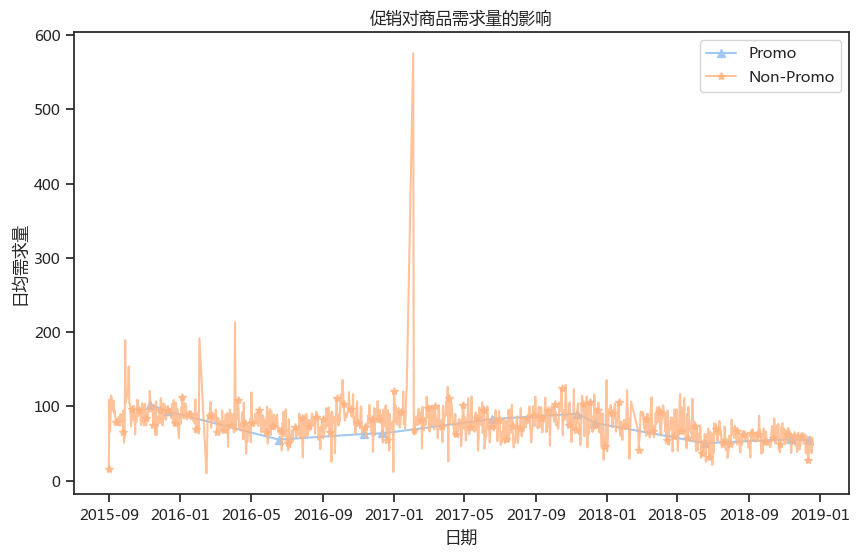

In [27]:
# 绘制折线图
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_promo_datamean.index, df_promo_datamean.values, label='Promo', marker='^')
ax.plot(df_nonpromo_datamean.index, df_nonpromo_datamean.values, label='Non-Promo', marker='*', markevery=12, alpha=0.8)
ax.set_xlabel('日期')
ax.set_ylabel('日均需求量')
ax.set_title('促销对商品需求量的影响')
ax.legend()
plt.show()

In [29]:
# 求每一日的订单需求总量，并按照促销日期分别求出促销期前一周，促销周，促销期后一周的订单需求量
df_count = data.groupby(['order_date'])['ord_qty'].sum()
# 促销前一周订单平均需求量
prepromoweek = [df_count["2015-10-27":"2015-11-3"].values.mean(), df_count["2015-11-28":"2015-12-4"].values.mean(),
                df_count["2016-6-3":"2016-6-10"].values.mean(),
                df_count["2016-10-27":"2016-11-3"].values.mean(), df_count["2016-11-28":"2016-12-4"].values.mean(),
                df_count["2017-6-3":"2017-6-10"].values.mean(),
                df_count["2017-10-27":"2017-11-3"].values.mean(), df_count["2017-11-28":"2017-12-4"].values.mean(),
                df_count["2018-6-3":"2018-6-10"].values.mean(),
                df_count["2018-10-27":"2018-11-3"].values.mean(), df_count["2018-11-28":"2018-12-4"].values.mean()]
# 促销周订单平均需求量
promoweek = [df_count["2015-11-4":"2015-11-11"].values.mean(), df_count["2015-12-5":"2015-12-12"].values.mean(),
             df_count["2016-6-11":"2016-6-18"].values.mean(),
             df_count["2016-11-4":"2016-11-11"].values.mean(), df_count["2016-12-5":"2016-12-12"].values.mean(),
             df_count["2017-6-11":"2017-6-18"].values.mean(),
             df_count["2017-11-4":"2017-11-11"].values.mean(), df_count["2017-12-5":"2017-12-12"].values.mean(),
             df_count["2018-6-11":"2018-6-18"].values.mean(),
             df_count["2018-11-4":"2018-11-11"].values.mean(), df_count["2018-12-5":"2018-12-12"].values.mean()]
# 促销后一周订单平均需求量
afterpromoweek = [df_count["2015-11-12":"2015-11-19"].values.mean(), df_count["2015-12-13":"2015-12-20"].values.mean(),
                  df_count["2016-6-19":"2016-6-26"].values.mean(),
                  df_count["2016-11-12":"2016-11-19"].values.mean(), df_count["2016-12-13":"2016-12-20"].values.mean(),
                  df_count["2017-6-19":"2017-6-26"].values.mean(),
                  df_count["2017-11-12":"2017-11-19"].values.mean(), df_count["2017-12-13":"2017-12-20"].values.mean(),
                  df_count["2018-6-19":"2018-6-26"].values.mean(),
                  df_count["2018-11-12":"2018-11-19"].values.mean(), df_count["2018-12-13":"2018-12-20"].values.mean()]

In [ ]:
# 绘制促销与需求量关系的柱状图，这个用的是Pyecharts0.5版本，因为我的pyecharts和jupyter版本有冲突，所以我就不运行了，你可以在自己电脑上运行看看
data = ["2015年双十一", "2015年双十二", "2016年618", "2016年双十一", "2016年双十二", "2017年618", "2017年双十一",
        "2017年双十二", "2018年618", "2018年双十一", "2018年双十二"]
bar = Bar("促销对需求量的影响")
bar.add("促销前一周", data, prepromoweek, xaxis_rotate=30)
bar.add("促销周", data, promoweek, xaxis_rotate=30)
bar.add("促销后一周", data, afterpromoweek, xaxis_rotate=30)
bar.render("柱状图.html")

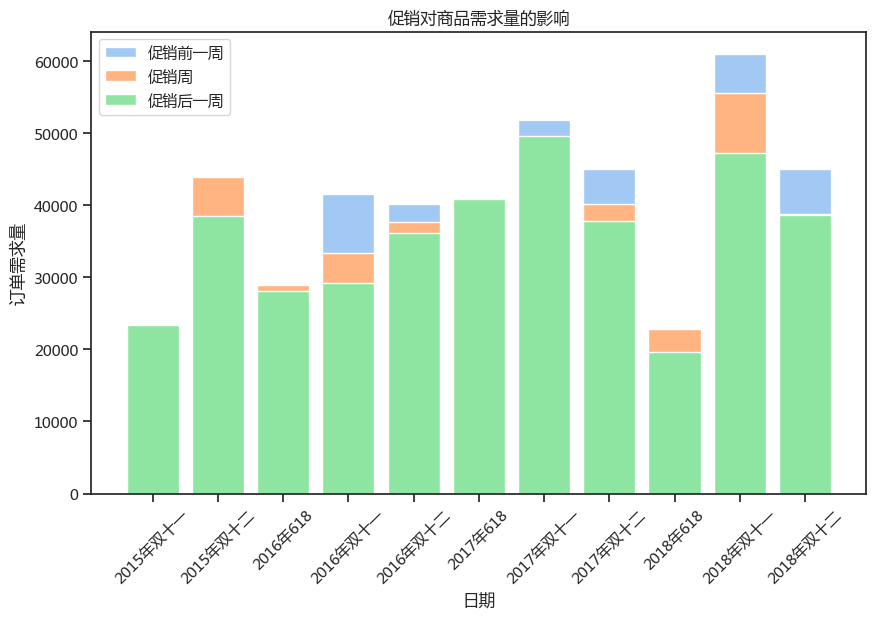

In [55]:
# 绘制促销与需求量关系的柱状图
dataRow = ["2015年双十一", "2015年双十二", "2016年618", "2016年双十一", "2016年双十二", "2017年618", "2017年双十一",
        "2017年双十二", "2018年618", "2018年双十一", "2018年双十二"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dataRow,prepromoweek, label='促销前一周')
ax.bar(dataRow,promoweek, label='促销周')
ax.bar(dataRow,afterpromoweek, label='促销后一周')
ax.set_xlabel('日期')
ax.set_ylabel('订单需求量')
plt.xticks(rotation = 45)
ax.set_title('促销对商品需求量的影响')
ax.legend()
plt.show()

In [56]:
# (8)季节因素对产品需求量的影响
# 读取数据，按照日期对订单需求量求和
data1= pd.read_csv('D:\火狐浏览器下载\B题-全部数据\B题-全部数据\data1.csv')
data1_sum = data1.groupby(['order_date'])['ord_qty'].sum().reset_index()
data1_sum

,order_date,ord_qty
0,2015-09-01,31
1,2015-09-02,1092
2,2015-09-03,2041
3,2015-09-04,9663
4,2015-09-05,19714
...,...,...
1167,2018-12-16,29827
1168,2018-12-17,25230
1169,2018-12-18,40029
1170,2018-12-19,38674


In [57]:
# 根据订单日期转换为季节
def date_to_season(date):
    year, month, day = map(int, date.split('-'))
    if month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Autumn'
    else:
        return 'Winter'

data1_sum['Season'] = data1_sum['order_date'].apply(date_to_season)
data1['Season'] = data1['order_date'].apply(date_to_season)
data1_sum
data1

,Unnamed: 0,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,Season
0,0,2015-09-01,104,22069,307,403,offline,1114.0,19,Autumn
1,1,2015-09-01,104,20028,301,405,offline,1012.0,12,Autumn
2,2,2015-09-02,104,21183,307,403,online,428.0,109,Autumn
3,3,2015-09-02,104,20448,308,404,online,962.0,3,Autumn
4,4,2015-09-02,104,21565,307,403,offline,1400.0,3,Autumn
...,...,...,...,...,...,...,...,...,...,...
582791,597689,2018-12-20,102,20994,302,408,offline,843.0,59,Winter
582792,597690,2018-12-20,102,21875,302,408,offline,762.0,502,Winter
582793,597691,2018-12-20,102,20215,302,408,offline,2013.0,106,Winter
582794,597692,2018-12-20,102,20195,302,408,offline,2120.0,187,Winter


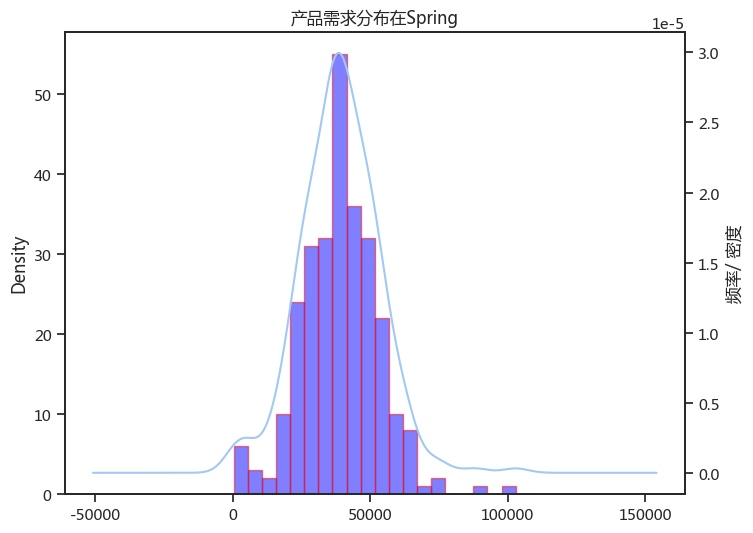

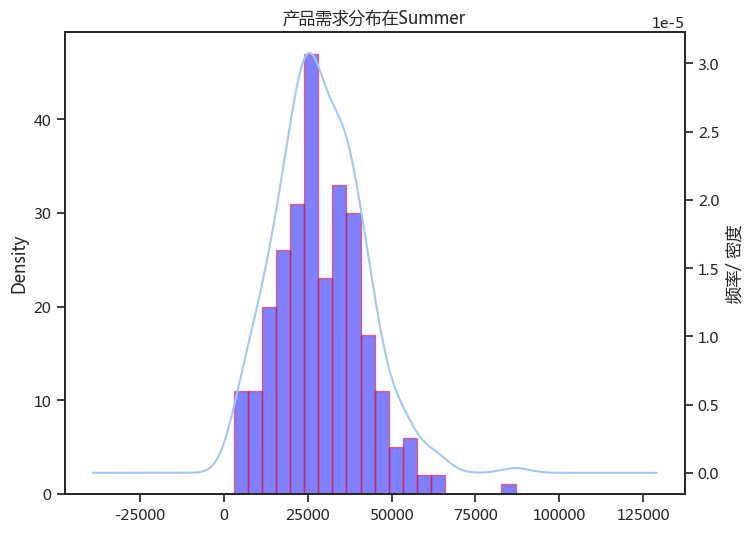

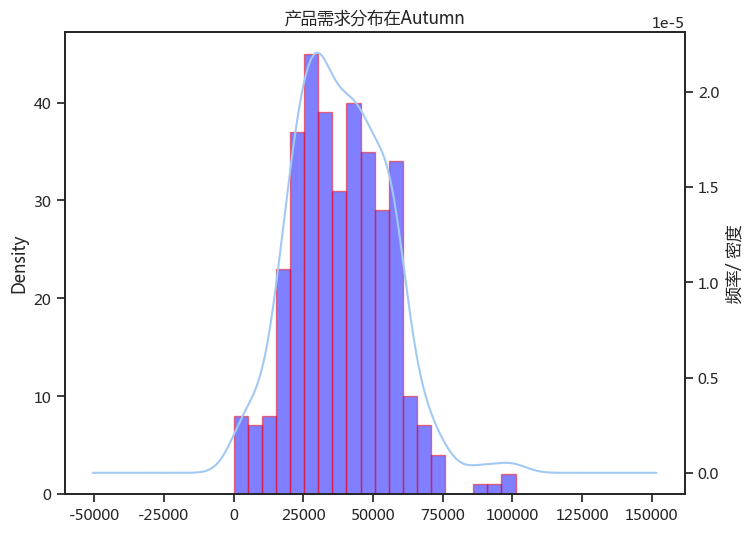

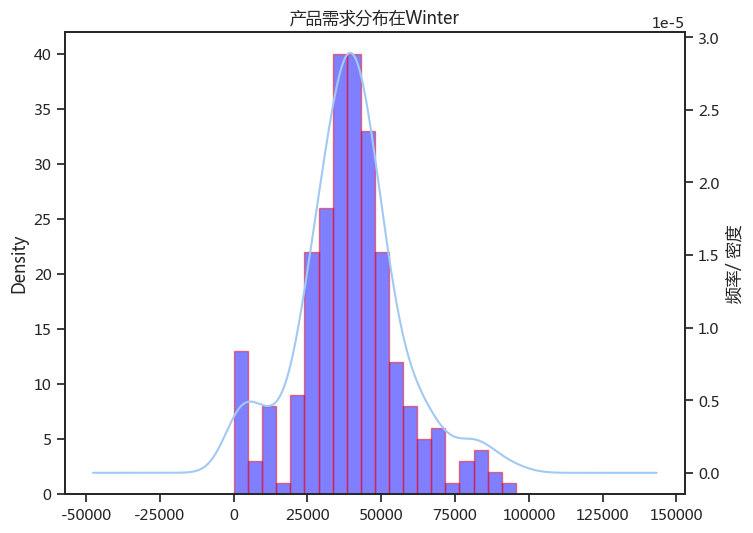

In [58]:
# 绘制每个季节订单需求量的的频率直方图，对其进行核密度估计
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    plt.figure(figsize=(8, 6))
    plt.hist(data1_sum[date_sum['Season'] == season]['ord_qty'], bins=20, alpha=0.5, color='blue', edgecolor='red')
    data_sum[data1_sum['Season'] == season]['ord_qty'].plot(kind='density', secondary_y=True)
    plt.title('产品需求分布在' + season)
    plt.xlabel('订单需求量')
    plt.ylabel('频率/ 密度')
    plt.show()

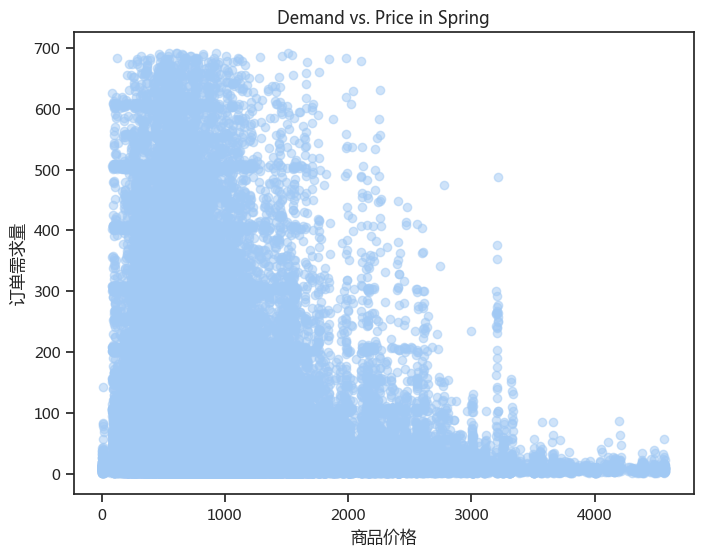

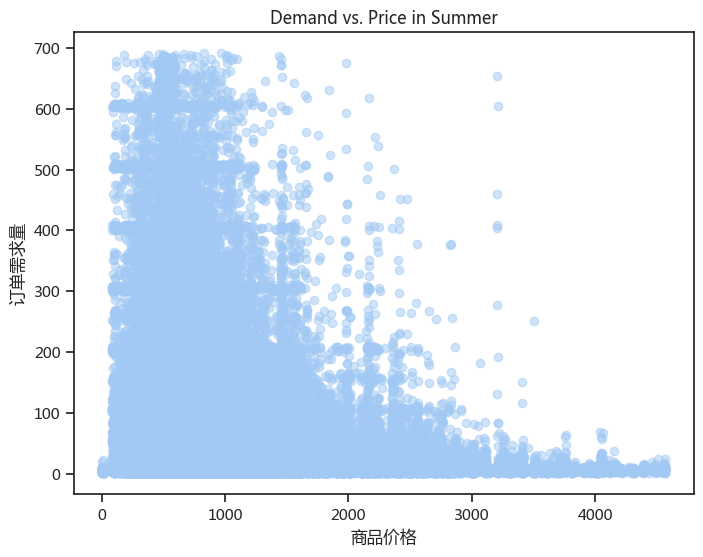

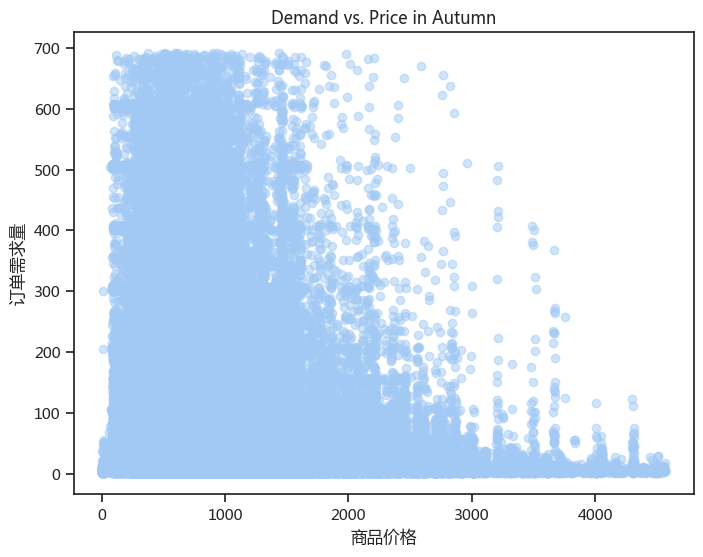

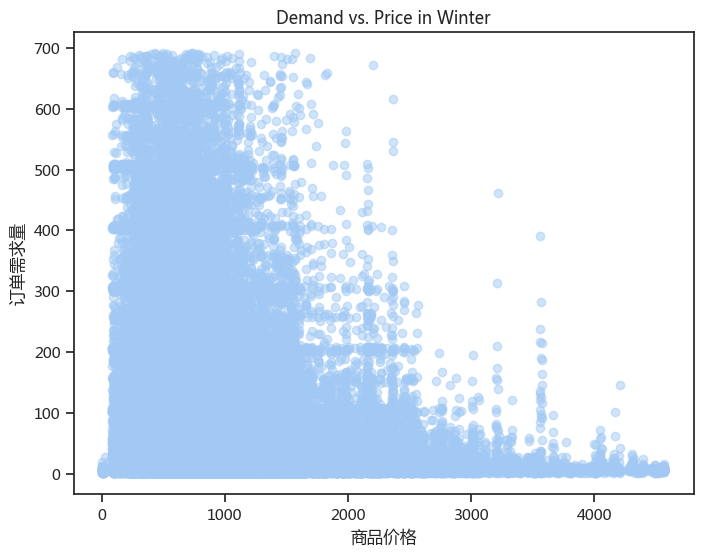

In [59]:
#(9)主题再拓展，探究不同季节价格与需求量关系
# 绘制不同季节价格与需求量关系散点图
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    plt.figure(figsize=(8,6))
    plt.scatter(data1[data1['Season'] == season]['item_price'], data1[data1['Season'] == season]['ord_qty'], alpha=0.5)
    plt.title('Demand vs. Price in ' + season)
    plt.xlabel('商品价格')
    plt.ylabel('订单需求量')
    plt.show()